<a href="https://colab.research.google.com/github/ahmetmungan/DeepLearningProjects/blob/data1_project/data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AHMET MUNGAN**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU bulunamadı')
print("GPU tespit edildi: {}".format(device_name))

GPU tespit edildi: /device:GPU:0


In [ ]:
data1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-1.xlsx')
X = data1.iloc[:,0:7]
y = data1.iloc[:,7]

#2 farklı sınıf var ve bu sınıflar binary olarak ayrılmıştır. Cammeo ise 1, Osmancik ise 0 nümerik değerler atanmıştır.
for i in range(len(y)):
  if y[i] == "Cammeo":
    y[i] = 1
  elif y[i] == "Osmancik":
    y[i] = 0
y = np.array([np.array(val) for val in y])
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Modelde 7 girişe karşın sırasıyla 14 ve 7 olmak üzere ara katmanlar belirlenmiştir.
model = Sequential()
model.add(Dense(14, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                112       
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#İkili sınıflandırma olduğu için hata fonksiyonu olarak binary cross entropi kullanılmıştır. ADAM optimizasyonuna göre model.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X,y,epochs=100,batch_size=10)

Epoch 1/100
381/381 [==============================] - 1s 2ms/step - loss: 3.5430 - accuracy: 0.6562
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 2.7775 - accuracy: 0.6974
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 2.4715 - accuracy: 0.7144
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 2.7700 - accuracy: 0.6892
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 2.1361 - accuracy: 0.7202
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 2.6730 - accuracy: 0.7142
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 1.9048 - accuracy: 0.7357
Epoch 8/100
381/381 [==============================] - 1s 2ms/step - loss: 2.3395 - accuracy: 0.7194
Epoch 9/100
381/381 [==============================] - 1s 2ms/step - loss: 2.7414 - accuracy: 0.7181
Epoch 10/100
381/381 [==============================] - 1s 2ms/step - loss: 2.8499 - accura

In [ ]:
#Model overfit olmuştur fakat early-stop ile epok sayısını 80'de tutarak bunun önüne geçilmiştir.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)
history=model.fit(X_train,y_train,validation_split=0.1,epochs=80)

Epoch 1/80
86/86 [==============================] - 1s 6ms/step - loss: 0.6192 - accuracy: 0.9078 - val_loss: 1.1245 - val_accuracy: 0.8689
Epoch 2/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8594 - accuracy: 0.8855 - val_loss: 0.5552 - val_accuracy: 0.9311
Epoch 3/80
86/86 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.8954 - val_loss: 0.7012 - val_accuracy: 0.9148
Epoch 4/80
86/86 [==============================] - 0s 3ms/step - loss: 0.7890 - accuracy: 0.8935 - val_loss: 0.6120 - val_accuracy: 0.9279
Epoch 5/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8498 - accuracy: 0.8841 - val_loss: 1.1568 - val_accuracy: 0.8525
Epoch 6/80
86/86 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.8903 - val_loss: 0.9410 - val_accuracy: 0.8689
Epoch 7/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.8833 - val_loss: 0.5337 - val_accuracy: 0.9213
Epoch 8/80
86/86 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


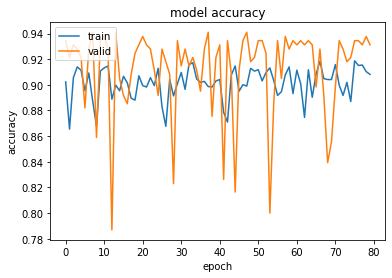

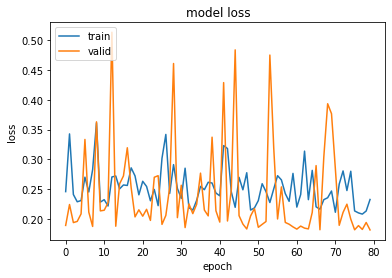

In [ ]:
print(history.history.keys())
histories = [] #farklı optimizer'ların grafiğini çizdirmek için liste şeklinde tutulmaktadır.
histories.append(history.history['val_accuracy'])
histories.append(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(histories[0])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(histories[1])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

96/96 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.8845
Training Accuracy: 88.45%

24/24 [==============================] - 0s 6ms/step - loss: 0.7400 - accuracy: 0.8740
Testing Accuracy: 87.40%



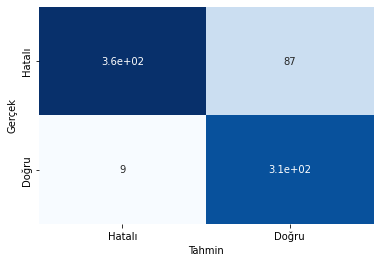

In [ ]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
y_pred_test = model.predict(X_test)
y_pred=[]
for i in y_pred_test:
  if(i>=0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["Hatalı",'Doğru'], yticklabels=['Hatalı','Doğru'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Tahmin')
ax.set_ylabel('Gerçek')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(14, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 14)                112       
                                                                 
 dense_10 (Dense)            (None, 7)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.fit(X,y,epochs=100,batch_size=10)

Epoch 1/100
381/381 [==============================] - 1s 2ms/step - loss: 934.9189 - accuracy: 0.5614
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 1.1953 - accuracy: 0.5541
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0671 - accuracy: 0.5848
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 0.8239 - accuracy: 0.6417
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 0.8950 - accuracy: 0.6163
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 0.7334 - accuracy: 0.6774
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.6934
Epoch 8/100
381/381 [==============================] - 1s 2ms/step - loss: 0.5798 - accuracy: 0.7446
Epoch 9/100
381/381 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.7879
Epoch 10/100
381/381 [==============================] - 1s 2ms/step - loss: 0.6490 - accu

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)
history=model.fit(X_train,y_train,validation_split=0.1,epochs=80)

Epoch 1/80
86/86 [==============================] - 1s 5ms/step - loss: 0.2457 - accuracy: 0.9023 - val_loss: 0.1889 - val_accuracy: 0.9344
Epoch 2/80
86/86 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8655 - val_loss: 0.2240 - val_accuracy: 0.9213
Epoch 3/80
86/86 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9056 - val_loss: 0.1936 - val_accuracy: 0.9311
Epoch 4/80
86/86 [==============================] - 0s 4ms/step - loss: 0.2286 - accuracy: 0.9140 - val_loss: 0.1956 - val_accuracy: 0.9279
Epoch 5/80
86/86 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9114 - val_loss: 0.2083 - val_accuracy: 0.9213
Epoch 6/80
86/86 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.8954 - val_loss: 0.3335 - val_accuracy: 0.8820
Epoch 7/80
86/86 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9092 - val_loss: 0.2112 - val_accuracy: 0.9279
Epoch 8/80
86/86 [==

In [ ]:
histories.append(history.history['val_accuracy'])
histories.append(history.history['val_loss'])

In [ ]:
model = Sequential()
model.add(Dense(14, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 14)                112       
                                                                 
 dense_13 (Dense)            (None, 7)                 105       
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.fit(X,y,epochs=100,batch_size=10)

Epoch 1/100
381/381 [==============================] - 1s 2ms/step - loss: 131.2659 - accuracy: 0.5764
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.7596
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0334 - accuracy: 0.7601
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0147 - accuracy: 0.7640
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0157 - accuracy: 0.7625
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0126 - accuracy: 0.7659
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0098 - accuracy: 0.7630
Epoch 8/100
381/381 [==============================] - 1s 2ms/step - loss: 0.9935 - accuracy: 0.7664
Epoch 9/100
381/381 [==============================] - 1s 2ms/step - loss: 1.0062 - accuracy: 0.7643
Epoch 10/100
381/381 [==============================] - 1s 2ms/step - loss: 0.9895 - accu

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=58)
history=model.fit(X_train,y_train,validation_split=0.1,epochs=80)

Epoch 1/80
86/86 [==============================] - 1s 5ms/step - loss: 0.8408 - accuracy: 0.7783 - val_loss: 0.7693 - val_accuracy: 0.7770
Epoch 2/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8406 - accuracy: 0.7787 - val_loss: 0.7680 - val_accuracy: 0.7639
Epoch 3/80
86/86 [==============================] - 0s 3ms/step - loss: 0.8399 - accuracy: 0.7783 - val_loss: 0.7706 - val_accuracy: 0.7836
Epoch 4/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8410 - accuracy: 0.7805 - val_loss: 0.7685 - val_accuracy: 0.7639
Epoch 5/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8386 - accuracy: 0.7787 - val_loss: 0.7714 - val_accuracy: 0.7902
Epoch 6/80
86/86 [==============================] - 0s 4ms/step - loss: 0.8389 - accuracy: 0.7838 - val_loss: 0.7672 - val_accuracy: 0.7803
Epoch 7/80
86/86 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.7805 - val_loss: 0.7664 - val_accuracy: 0.7803
Epoch 8/80
86/86 [==

In [ ]:
histories.append(history.history['val_accuracy'])
histories.append(history.history['val_loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


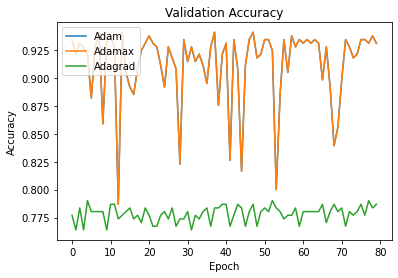

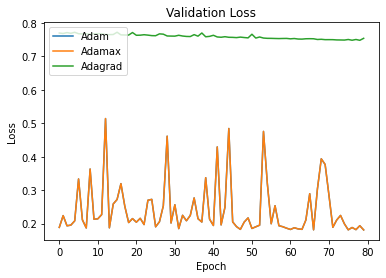

In [ ]:
print(history.history.keys())

plt.plot(histories[0])
plt.plot(histories[2])
plt.plot(histories[4])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam', 'Adamax', 'Adagrad'], loc='upper left')
plt.show()

plt.plot(histories[1])
plt.plot(histories[3])
plt.plot(histories[5])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Adam', 'Adamax', 'Adagrad'], loc='upper left')
plt.show()